In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image

### Load Data

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [16]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Split Data into Training and Test Sets

In [17]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names],df['target'],random_state=0)

One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

## Classification Tree

<b>Step 1</b>: Import the model you want to use

In [18]:
from sklearn.tree import DecisionTreeClassifier

<b>Step 2</b>: Make an instance of the Model

In [19]:
clf = DecisionTreeClassifier(max_depth=2)

<b>Step 3</b>: Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [20]:
clf.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Step 4</b>: Predict the labels of new data (new images)

To predict a class of a new instance given its feature measurements using the decision tree, start at the root of the decision tree and take the decision at the each level based on the appropriate feature measurement until you get to the leaf node. The prediction is just the majority class of the instances in that leaf node.

Uses the information the model learned during the model training process

In [21]:
# Predict for 1 observation 
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

Predict for Multiple Observations (images) at Once

In [22]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

### Visualize Decision Tree

You can create a dot file easily with .export_graphviz. Converting it to png can be a hassle without [homebrew](https://hackernoon.com/how-to-install-and-use-homebrew-80eeb55f73e9) or conda. If you don't want to install graphviz, you can use an [online converter](http://webgraphviz.com). 

In [24]:
tree.export_graphviz(clf,
                     out_file="iris_depth2_decisionTree.dot",
                     feature_names=data.feature_names,
                     class_names=data.target_names, 
                     filled = False)

In [25]:
!dot -Tpng iris_depth2_decisionTree.dot -o iris_depth2_decisionTree.png

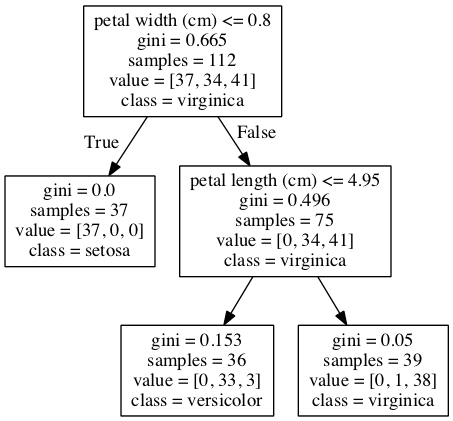

In [26]:
PATH = !pwd
Image(filename = PATH[0] + "/iris_depth2_decisionTree.png")